# K-means Clustering

Iris 데이터 사용

In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
feature = data[ ['Sepal length','Sepal width']]
feature.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']
labels = model.labels_

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)


     Sepal length  Sepal width  predict
0             5.1          3.5        0
1             4.9          3.0        0
2             4.7          3.2        0
3             4.6          3.1        0
4             5.0          3.6        0
5             5.4          3.9        0
6             4.6          3.4        0
7             5.0          3.4        0
8             4.4          2.9        0
9             4.9          3.1        0
10            5.4          3.7        0
11            4.8          3.4        0
12            4.8          3.0        0
13            4.3          3.0        0
14            5.8          4.0        0
15            5.7          4.4        0
16            5.4          3.9        0
17            5.1          3.5        0
18            5.7          3.8        0
19            5.1          3.8        0
20            5.4          3.4        0
21            5.1          3.7        0
22            4.6          3.6        0
23            5.1          3.3        0


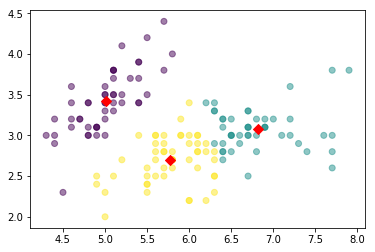

In [5]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

# scatter plot
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [6]:
metrics.silhouette_score(feature, labels, metric='euclidean')

NameError: name 'metrics' is not defined

# Kernel K means Clustering

# Affinity Propagation Clustering

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


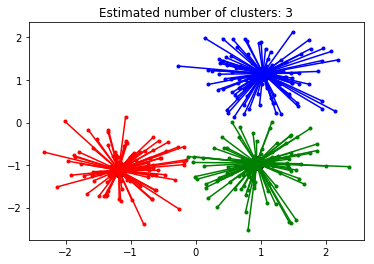

In [41]:
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [8]:
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs


# Compute Affinity Propagation
af = AffinityPropagation(preference=-50)
af.fit(feature)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

predict = pd.DataFrame(af.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)


Automatically created module for IPython interactive environment
     Sepal length  Sepal width  predict
0             5.1          3.5        0
1             4.9          3.0        0
2             4.7          3.2        0
3             4.6          3.1        0
4             5.0          3.6        0
5             5.4          3.9        0
6             4.6          3.4        0
7             5.0          3.4        0
8             4.4          2.9        0
9             4.9          3.1        0
10            5.4          3.7        0
11            4.8          3.4        0
12            4.8          3.0        0
13            4.3          3.0        0
14            5.8          4.0        0
15            5.7          4.4        0
16            5.4          3.9        0
17            5.1          3.5        0
18            5.7          3.8        0
19            5.1          3.8        0
20            5.4          3.4        0
21            5.1          3.7        0
22            4

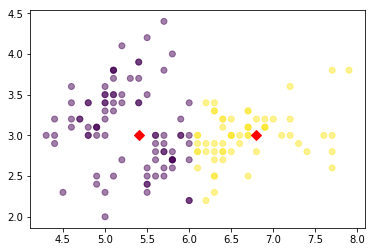

In [9]:
centers = pd.DataFrame(af.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

# scatter plot
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

# Affinity evaluation

In [10]:
metrics.silhouette_score(feature, labels, metric='euclidean')

0.45409805783573137

# Density Peak Clustering

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pydpc import Cluster
from pydpc._reference import Cluster as RefCluster

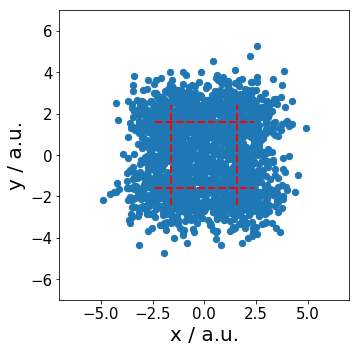

In [12]:
# generate the data points
npoints = 2000
mux = 1.6
muy = 1.6
points = np.zeros(shape=(npoints, 2), dtype=np.float64)
points[:, 0] = np.random.randn(npoints) + mux * (-1)**np.random.randint(0, high=2, size=npoints)
points[:, 1] = np.random.randn(npoints) + muy * (-1)**np.random.randint(0, high=2, size=npoints)
# draw the data points
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(points[:, 0], points[:, 1], s=40)
ax.plot([-mux, -mux], [-1.5 * muy, 1.5 * muy], '--', linewidth=2, color="red")
ax.plot([mux, mux], [-1.5 * muy, 1.5 * muy], '--', linewidth=2, color="red")
ax.plot([-1.5 * mux,  1.5 * mux], [-muy, -muy], '--', linewidth=2, color="red")
ax.plot([-1.5 * mux,  1.5 * mux], [muy, muy], '--', linewidth=2, color="red")
ax.set_xlabel(r"x / a.u.", fontsize=20)
ax.set_ylabel(r"y / a.u.", fontsize=20)
ax.tick_params(labelsize=15)
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])
ax.set_aspect('equal')
fig.tight_layout()

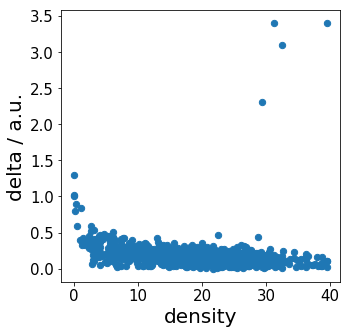

In [29]:


clu = Cluster(points)

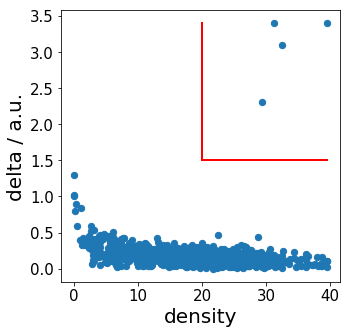

In [30]:
clu.assign(20, 1.5)

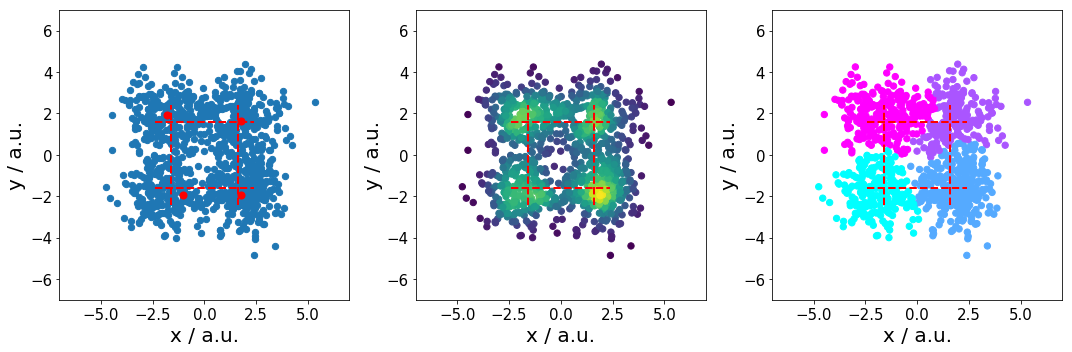

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(points[:, 0], points[:, 1], s=40)
ax[0].scatter(points[clu.clusters, 0], points[clu.clusters, 1], s=50, c="red")
ax[1].scatter(points[:, 0], points[:, 1], s=40, c=clu.density)
ax[2].scatter(points[:, 0], points[:, 1], s=40, c=clu.membership, cmap=mpl.cm.cool)
for _ax in ax:
    _ax.plot([-mux, -mux], [-1.5 * muy, 1.5 * muy], '--', linewidth=2, color="red")
    _ax.plot([mux, mux], [-1.5 * muy, 1.5 * muy], '--', linewidth=2, color="red")
    _ax.plot([-1.5 * mux,  1.5 * mux], [-muy, -muy], '--', linewidth=2, color="red")
    _ax.plot([-1.5 * mux,  1.5 * mux], [muy, muy], '--', linewidth=2, color="red")
    _ax.set_xlabel(r"x / a.u.", fontsize=20)
    _ax.set_ylabel(r"y / a.u.", fontsize=20)
    _ax.tick_params(labelsize=15)
    _ax.set_xlim([-7, 7])
    _ax.set_ylim([-7, 7])
    _ax.set_aspect('equal')
fig.tight_layout()

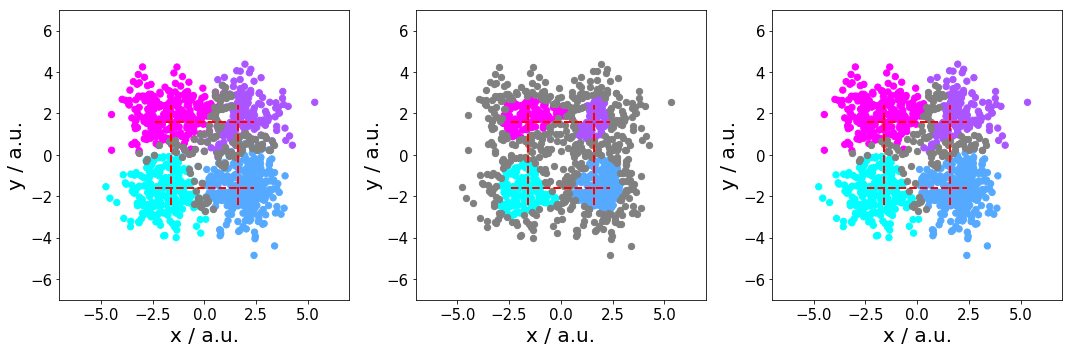

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(
    points[:, 0], points[:, 1],
    s=40, c=clu.membership, cmap=mpl.cm.cool)
ax[0].scatter(points[clu.border_member, 0], points[clu.border_member, 1], s=40, c="grey")
ax[1].scatter(
    points[clu.core_idx, 0], points[clu.core_idx, 1],
    s=40, c=clu.membership[clu.core_idx], cmap=mpl.cm.cool)
ax[1].scatter(points[clu.halo_idx, 0], points[clu.halo_idx, 1], s=40, c="grey")
clu.autoplot=False
clu.assign(20, 1.5, border_only=True)
ax[2].scatter(
    points[clu.core_idx, 0], points[clu.core_idx, 1],
    s=40, c=clu.membership[clu.core_idx], cmap=mpl.cm.cool)
ax[2].scatter(points[clu.halo_idx, 0], points[clu.halo_idx, 1], s=40, c="grey")
ax[2].tick_params(labelsize=15)
for _ax in ax:
    _ax.plot([-mux, -mux], [-1.5 * muy, 1.5 * muy], '--', linewidth=2, color="red")
    _ax.plot([mux, mux], [-1.5 * muy, 1.5 * muy], '--', linewidth=2, color="red")
    _ax.plot([-1.5 * mux,  1.5 * mux], [-muy, -muy], '--', linewidth=2, color="red")
    _ax.plot([-1.5 * mux,  1.5 * mux], [muy, muy], '--', linewidth=2, color="red")
    _ax.set_xlabel(r"x / a.u.", fontsize=20)
    _ax.set_ylabel(r"y / a.u.", fontsize=20)
    _ax.tick_params(labelsize=15)
    _ax.set_xlim([-7, 7])
    _ax.set_ylim([-7, 7])
    _ax.set_aspect('equal')
fig.tight_layout()

In [33]:
npoints = 1000
points = np.zeros(shape=(npoints, 2), dtype=np.float64)
points[:, 0] = np.random.randn(npoints) + 1.8 * (-1)**np.random.randint(0, high=2, size=npoints)
points[:, 1] = np.random.randn(npoints) + 1.8 * (-1)**np.random.randint(0, high=2, size=npoints)

%timeit Cluster(points, fraction=0.02, autoplot=False)
%timeit RefCluster(fraction=0.02, autoplot=False).load(points)

56.8 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.41 s ± 53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%%timeit
Cluster(points, fraction=0.02, autoplot=False).assign(20, 1.5)

58.8 ms ± 196 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
%%timeit
tmp = RefCluster(fraction=0.02, autoplot=False)
tmp.load(points)
tmp.assign(20, 1.5)

4.89 s ± 27.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
